In [1]:
from astropy.io import fits
import astropy.stats
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv
import logging
import asyncio
import pandas as pd
from astropy.io import fits
from astropy.time import Time
from astropy.table import Table

from lsst_efd_client import EfdClient
client = EfdClient('tucson_teststand_efd')

from lsst.ts import salobj

## Initialize

In [3]:
d = salobj.Domain()

In [4]:
atmonochromator = salobj.Remote(d, 'ATMonochromator')
FiberSpectrograph = salobj.Remote(name="FiberSpectrograph", domain=d, index=3)
electrometer = salobj.Remote(name="Electrometer", domain=d, index=5) 
WhiteLightSource = salobj.Remote(name='ATWhiteLight', domain=d)

In [5]:
await atmonochromator.start_task
await FiberSpectrograph.start_task
await electrometer.start_task
await WhiteLightSource.start_task

In [19]:
wls_tmp = await WhiteLightSource.evt_summaryState.aget()
print(salobj.State(wls_tmp.summaryState))

State.STANDBY


In [ ]:
await electrometer.cmd_setRange.set_start(range=)

In [20]:
tmp = await WhiteLightSource.evt_heartbeat.aget()
print(tmp)

private_revCode: 6de2d94b, private_sndStamp: 1664926370.021167, private_rcvStamp: 1664926370.022795, private_seqNum: 21, private_identity: ATWhiteLight, private_origin: 5530, heartbeat: False


In [21]:
tmp = await salobj.set_summary_state(WhiteLightSource, salobj.State.ENABLED)

In [22]:
async def get_status():
    mono_tmp = await atmonochromator.evt_summaryState.aget()
    spec_tmp = await FiberSpectrograph.evt_summaryState.aget()
    elec_tmp = await electrometer.evt_summaryState.aget()
    wls_tmp = await WhiteLightSource.evt_summaryState.aget()
    print('Monochromator: ',salobj.State(mono_tmp.summaryState))
    print('Fiber Spectrometer: ',salobj.State(spec_tmp.summaryState))
    print('Electrometer: ',salobj.State(elec_tmp.summaryState))
    print('WhiteLightSource: ',salobj.State(wls_tmp.summaryState))

In [23]:
await get_status()

Monochromator:  State.STANDBY
Fiber Spectrometer:  State.STANDBY
Electrometer:  State.STANDBY
WhiteLightSource:  State.ENABLED


In [24]:
async def power_cycle():
    state = salobj.State.STANDBY
    tmp = await salobj.set_summary_state(atmonochromator, state)
    tmp = await salobj.set_summary_state(FiberSpectrograph, state)
    #tmp = await salobj.set_summary_state(WhiteLightSource, state)
    tmp = await salobj.set_summary_state(electrometer, state, override='tts_cimacs3_v3.yaml',timeout=20)
    state = salobj.State.ENABLED
    tmp = await salobj.set_summary_state(atmonochromator, state)
    tmp = await salobj.set_summary_state(FiberSpectrograph, state)
    tmp = await salobj.set_summary_state(electrometer, state, override='tts_cimacs3_v3.yaml',timeout=20)
    #tmp = await salobj.set_summary_state(WhiteLightSource, state)


In [25]:
state = salobj.State.ENABLED
tmp = await salobj.set_summary_state(atmonochromator, state)
tmp = await salobj.set_summary_state(FiberSpectrograph, state)
tmp = await salobj.set_summary_state(electrometer, state, override='tts_cimacs3_v3.yaml',timeout=20)

In [30]:
state = salobj.State.ENABLED
tmp = await salobj.set_summary_state(WhiteLightSource, state)

In [36]:
await power_cycle()

In [32]:
await get_status()

Monochromator:  State.ENABLED
Fiber Spectrometer:  State.ENABLED
Electrometer:  State.ENABLED
WhiteLightSource:  State.ENABLED


In [26]:
await electrometer.cmd_performZeroCalib.set_start(timeout=10)
await electrometer.cmd_setDigitalFilter.set_start(activateFilter=False, activateAvgFilter=False, activateMedFilter=False, timeout=10)

In [31]:
tmp = await WhiteLightSource.cmd_startChiller.set_start()
print(tmp)

private_revCode: 5231ebcc, private_sndStamp: 1664926572.0448732, private_rcvStamp: 1664926572.0468004, private_seqNum: 1580812443, private_identity: ATWhiteLight, private_origin: 5530, ack: 303, error: 0, result: Done, identity: parfa30@nb-parfa30, origin: 11507, cmdtype: 16, timeout: 0.0


In [13]:
tmp = await WhiteLightSource.cmd_setChillerTemperature.set_start(temperature=25)
print(tmp)

private_revCode: 5231ebcc, private_sndStamp: 1663620243.9408054, private_rcvStamp: 1663620243.9426765, private_seqNum: 1031036605, private_identity: ATWhiteLight, private_origin: 23295, ack: 303, error: 0, result: Done, identity: parfa30@nb-parfa30, origin: 45886, cmdtype: 12, timeout: 0.0


In [58]:
tmp = await WhiteLightSource.evt_chillerAlarms.aget()
print(tmp)

private_revCode: e4059392, private_sndStamp: 1662573355.1733017, private_rcvStamp: 1662573355.1783552, private_seqNum: 5, private_identity: ATWhiteLight, private_origin: 27525, level1: 0, level21: 0, level22: 0


In [42]:
tmp = await WhiteLightSource.cmd_turnLampOff.set_start()
print(tmp)

private_revCode: 5231ebcc, private_sndStamp: 1664928508.2809098, private_rcvStamp: 1664928508.2828944, private_seqNum: 1936743659, private_identity: ATWhiteLight, private_origin: 5530, ack: 303, error: 0, result: Done, identity: parfa30@nb-parfa30, origin: 11507, cmdtype: 18, timeout: 0.0


In [ ]:
await WhiteLightSource.cmd

In [26]:
tmp = await WhiteLightSource.cmd_turnLampOff.set_start(force=True)
print(tmp)

private_revCode: 5231ebcc, private_sndStamp: 1664488699.292492, private_rcvStamp: 1664488699.2943873, private_seqNum: 1969725246, private_identity: ATWhiteLight, private_origin: 24312, ack: 303, error: 0, result: Done, identity: parfa30@nb-parfa30, origin: 24048, cmdtype: 18, timeout: 0.0


In [91]:
tmp = await WhiteLightSource.evt_lampState.aget()
print(tmp)

private_revCode: 1f31f2fa, private_sndStamp: 1663792455.3476713, private_rcvStamp: 1663792455.3500082, private_seqNum: 6, private_identity: ATWhiteLight, private_origin: 2955, basicState: 2, controllerError: -1, controllerState: 2, setPower: 1200.0, cooldownEndTime: 0.0, warmupEndTime: 1663787520.0


In [43]:
LampBasicState = {0:'Unknown',1:'Off',2:'On',3:'?',4:'Cooldown',5:'Warmup'}
LampControllerError = {-1:'NoError',0:'Unknown',1:'KillSwitch',2:'ChassisOverheating',
                       3:'AccessDoor',4:'BallastOverheasting',5:'USBDisconnected',6:'AirflowMalfunction',
                       7:'LampStuckOn',8:'AirflowMalfunction'}
LampControllerState = {0:'Unknown',1:'Off',2:'StandbyOrOn',3:'Cooldown',4:'Error'}

In [44]:
state = await WhiteLightSource.evt_lampState.aget()
print(state)
print(LampBasicState[state.basicState], LampControllerError[state.controllerError], LampControllerState[state.controllerState])
print((state.warmupEndTime - state.private_rcvStamp)/60.)
if LampBasicState[state.basicState] == 'Cooldown':
    time_left = state.cooldownEndTime - state.private_rcvStamp
    print('Time Left: {} min.'.format(time_left/60.))

elif LampBasicState[state.basicState] == 'Warmup':
    time_left = state.warmupEndTime - state.private_rcvStamp
    print('Time Left: {} min.'.format(time_left/60.))

private_revCode: 1f31f2fa, private_sndStamp: 1664928508.3310466, private_rcvStamp: 1664928508.332703, private_seqNum: 6, private_identity: ATWhiteLight, private_origin: 5530, basicState: 3, controllerError: -1, controllerState: 3, setPower: 0.0, cooldownEndTime: 1664929408.0, warmupEndTime: 1664927616.0
? NoError Cooldown
-14.872211718559265


In [52]:
tmp = await WhiteLightSource.cmd_closeShutter.set_start()

## Prepare

In [33]:
async def set_params(wave, entry_width, exit_width, grating):
    await atmonochromator.cmd_changeSlitWidth.set_start(slit=1, slitWidth=entry_width)
    await atmonochromator.cmd_changeSlitWidth.set_start(slit=2, slitWidth=exit_width)
    await atmonochromator.cmd_changeWavelength.set_start(wavelength=wave)
    #await atmonochromator.cmd_selectGrating.set_start(gratingType=grating, timeout=60)
   
    await electrometer.cmd_performZeroCalib.set_start(timeout=10)
    #await electrometer.cmd_setDigitalFilter.set_start(activateFilter=False, activateAvgFilter=False, activateMedFilter=False, timeout=10)
    
    tmp1 = await atmonochromator.evt_wavelength.aget()
    tmp2 = await atmonochromator.evt_entrySlitWidth.aget()
    tmp3 = await atmonochromator.evt_exitSlitWidth.aget()
    tmp4 = await atmonochromator.evt_selectedGrating.aget()
    return (tmp1.wavelength, tmp2.width, tmp3.width, tmp4.gratingType)

In [34]:
async def get_params(wave, entry_width, exit_width, grating):
    tmp1 = await atmonochromator.evt_wavelength.aget()
    tmp2 = await atmonochromator.evt_entrySlitWidth.aget()
    tmp3 = await atmonochromator.evt_exitSlitWidth.aget()
    tmp4 = await atmonochromator.evt_selectedGrating.aget()
    return (tmp1.wavelength, tmp2.width, tmp3.width, tmp4.gratingType)

In [35]:
async def spect_meas(exp_time):
    FiberSpectrograph.evt_largeFileObjectAvailable.flush()
    tmp1 = await FiberSpectrograph.cmd_expose.set_start(duration=exp_time, numExposures=1)
    lfa = await FiberSpectrograph.evt_largeFileObjectAvailable.next(flush=False, timeout=10)
    filename=lfa.url.split('FiberSpectrograph')[-1]
    os.system(f"curl {lfa.url} --output /home/parfa30/DATA/fiberSpec_files/{filename}")
    return filename

In [36]:
async def elec_meas(exp_time):
    tmp1=await electrometer.cmd_startScan.set_start(timeout=10)
    await asyncio.sleep(exp_time)
    tmp2=await electrometer.cmd_stopScan.set_start(timeout=10)
    #print(tmp2)

In [37]:
async def get_step_data(start_time, end_time, electrometer):
    start_log_topic = 'lsst.sal.Electrometer.command_startScan'
    start_df =  await client.select_time_series(start_log_topic, ['salIndex'], start=start_time, end=end_time)
    start_df['message'] = 'startScan Completed'
    start_df['functionName'] = 'do_startScan'
    msg_log_topic = 'lsst.sal.Electrometer.logevent_logMessage'
    msg_df = await client.select_time_series(msg_log_topic,['salIndex','functionName','message'], start=start_time, end=end_time)
    elec_df = pd.concat([start_df, msg_df])
    elec_df.sort_index(inplace=True)
    #print(elec_df)
    data = []
    scans = elec_df[elec_df.salIndex == electrometer]
    scans.reset_index(inplace=True)
    if len(scans) > 0:
        for i, row in scans.iterrows():
            if row['functionName'] == 'write_fits_file':
                try:
                    file_row = scans.iloc[i]
                    filen = file_row['message'].split(' ')[-1]
                    summary_row = scans.iloc[i+1]
                    if 'Scan Summary' in summary_row['message']:
                        x = summary_row['message']
                        x = x.split(':')[1].split(',')
                        mean_ = float(x[0].strip(' ').strip('['))
                        median_ = float(x[1].strip(' '))
                        std_ = float(x[2].strip(' ').strip(']'))
                    else:
                        filen, mean_, median_, std_ = 'None', np.nan, np.nan, np.nan
                except:
                    filen, mean_, median_, std_= 'None', np.nan, np.nan, np.nan

                return filen, mean_, median_, std_
    else:
        return ('None', np.nan, np.nan, np.nan)

In [38]:
async def setup_data_file(test_name, start_time, end_time, df, fs=False, elec=False):
    data_dir = '/home/parfa30/DATA/AuxTel'
    hdr = fits.Header()
    try:
        hdr['START'] = str(start_time.isot)
        hdr['STOP'] = str(end_time.isot)
    except:
        hdr['START'] = str(start_time)
        hdr['STOP'] = str(end_time)
    
    empty_primary = fits.PrimaryHDU(header=hdr)
    hdul = fits.HDUList([empty_primary]) 
    ee = [Time(e).isot for e in df['end']]
    ss = [Time(e).isot for e in df['start']]
    t = Table.from_pandas(df)
    t['end'] = ee
    t['start'] = ss
    print(t.dtype)
    hdul.append(fits.BinTableHDU(t.as_array(), name='CONFIG'))
    
    elec_data = []
    if elec:
        for i, row in df.iterrows():
            try:
                filen_, mean_, median_, std_ = await get_step_data(Time(row['start']), Time(row['end']), 5)
                elec_data.append([row['start'], row['end'], filen_, mean_, median_, std_])
            except:
                elec_data.append([row['start'], row['end'], 'None', np.nan, np.nan, np.nan])
        dd = pd.DataFrame(elec_data, columns = ['start','end','filen','mean','median','std'])
        ee = [Time(e).isot for e in df['end']]
        ss = [Time(e).isot for e in df['start']]
        t = Table.from_pandas(dd)
        t['end'] = ee
        t['start'] = ss
        hdul.append(fits.BinTableHDU(t.as_array(), name='KEITHLEY'))
    
    if fs:
        spectra = []
        for f in df['file']:
            fs_file = os.path.join('/home/parfa30/DATA/fiberSpec_files', f)
            hdu = fits.open(fs_file)
            wave = hdu[1].data['wavelength'][0].flatten()
            spectra.append(hdu[0].data)
        hdul.append(fits.ImageHDU(spectra, name='SPECTRO'))
    
        waves = np.array(wave, dtype=[('Wavelength', '<f8')])
        hdul.append(fits.TableHDU(waves, name='WAVELENGTH'))

    hdul.writeto(f'{os.path.join(data_dir,test_name)}.fits', overwrite=True)
    print(f'Data saved to file {os.path.join(data_dir,test_name)}.fits')

## Test 0: Spectral Lamp

In [66]:
exp_time = 0.00005
FiberSpectrograph.evt_largeFileObjectAvailable.flush()
tmp1 = await FiberSpectrograph.cmd_expose.set_start(duration=exp_time, numExposures=1)
print(tmp1)
lfa = await FiberSpectrograph.evt_largeFileObjectAvailable.next(flush=False, timeout=10)
print(lfa)
filename=lfa.url.split('FiberSpectrograph')[-1]
print(filename)
os.system(f"curl {lfa.url} --output /home/parfa30/DATA/fiberSpec_files/{filename}")
#filename = await spect_meas(exp_time)
#print(filename)

private_revCode: d89ac549, private_sndStamp: 1662503151.531496, private_rcvStamp: 1662503151.5332391, private_seqNum: 1006012679, private_identity: FiberSpectrograph:3, private_origin: 22562, salIndex: 3, ack: 303, error: 0, result: Done, identity: parfa30@nb-parfa30, origin: 38703, cmdtype: 5, timeout: 0.0
salIndex: 3, private_revCode: 8a05df23, private_sndStamp: 1662503151.528544, private_rcvStamp: 1662503151.5305793, private_seqNum: 15, private_identity: FiberSpectrograph:3, private_origin: 22562, url: https://s3.tu.lsst.org/rubinobs-lfa-tuc/FiberSpectrograph:Broad/fiberSpecBroad/2022/09/06/FiberSpectrograph:Broad_fiberSpecBroad_2022-09-06T22:25:51.244.fits, generator: fiberSpecBroad, version: 0.0, byteSize: 0, checkSum: , mimeType: , id: 
:Broad_fiberSpecBroad_2022-09-06T22:25:51.244.fits


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   711k      0 --:--:-- --:--:-- --:--:--  715k


0

In [68]:
filename = await spect_meas(exp_time)
print(filename)

:Broad_fiberSpecBroad_2022-09-06T22:26:37.710.fits


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   609k      0 --:--:-- --:--:-- --:--:--  615k


In [69]:
import subprocess
data_dir = '/home/parfa30/DATA'
new_filen = os.path.join(data_dir, 'AuxTel/spectral_lamp-{}.fits'.format(Time.now().isot))
print(new_filen)
bashCommand = "mv {} {}".format(os.path.join(data_dir, 'fiberSpec_files',filename), new_filen)
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

/home/parfa30/DATA/AuxTel/spectral_lamp-2022-09-06T22:26:02.021.fits


## Test 1: Slit Width vs. Wavelength

In [92]:
power = 1000
grating = 1
tmp = await atmonochromator.cmd_selectGrating.set_start(gratingType=grating)

In [105]:
tmp = await set_params(600, 4, 4, 1)

AckError: msg='Command failed', ackcmd=(ackcmd private_seqNum=169574399, ack=<SalRetCode.CMD_TIMEOUT: -304>, error=1, result='Timeout')

In [ ]:
exp_time = 2.
for wave in [300, 400, 500, 600, 700, 800, 900, 1000]:
    start_time = Time.now()
    data = []
    print(wave, start_time)
    for entry_width in [0.2, 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5]: #[, 0.1]: #, 3., 4., 4.9]:,
        for exit_width in [0.2, 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5]: #[0.02,0.04, 0.06, 0.08, 0.1]: #, 3., 4., 4.9]:
            start_meas = Time.now().isot
            print(entry_width, exit_width)
            try:
                tmp = await set_params(wave, exit_width, entry_width, grating)
                tmp2 = await elec_meas(1)
                filename = await spect_meas(exp_time)
                end_meas = Time.now().isot
                data.append([start_meas, end_meas, tmp[2], tmp[1], tmp[0], filename])
            except:
                print('fault')
                break
                # 
                # await power_cycle()
                # tmp = await set_params(wave, exit_width, entry_width, grating)
                # filename = await spect_meas(exp_time)
                # tmp2 = await elec_meas(exp_time)           
                # end_meas = Time.now().isot
                # data.append([start_meas, end_meas, tmp[2], tmp[1], tmp[0], filename])
                # print('success')
            
    df = pd.DataFrame(data, columns=['start','end','exit','entry','wavelength', 'file'])
    end_time = Time.now()
    print(end_time)
    await setup_data_file('slit_vs_wave_{}nm_grating{}_{}W_broad'.format(int(wave), grating, power),start_time, end_time, df, fs=True, elec=True)

300 2022-07-27 22:35:48.299715
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1123k      0 --:--:-- --:--:-- --:--:-- 1158k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1345k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1041k      0 --:--:-- --:--:-- --:--:-- 1064k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1324k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1310k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1144k      0 --:--:-- --:--:-- --:--:-- 1158k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1227k      0 --:--:-- --:--:-- --:--:-- 1230k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1293k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1167k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1252k      0 --:--:-- --:--:-- --:--:-- 1230k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1243k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   820k      0 --:--:-- --:--:-- --:--:--  837k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   742k      0 --:--:-- --:--:-- --:--:--  757k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1379k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   592k      0 --:--:-- --:--:-- --:--:--  596k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1181k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   598k      0 --:--:-- --:--:-- --:--:--  605k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1163k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1121k      0 --:--:-- --:--:-- --:--:-- 1158k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1525k      0 --:--:-- --:--:-- --:--:-- 1575k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1406k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1418k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   600k      0 --:--:-- --:--:-- --:--:--  605k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1201k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   738k      0 --:--:-- --:--:-- --:--:--  742k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1424k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   673k      0 --:--:-- --:--:-- --:--:--  678k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1215k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1517k      0 --:--:-- --:--:-- --:--:-- 1575k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1270k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1489k      0 --:--:-- --:--:-- --:--:-- 1514k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1215k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1434k      0 --:--:-- --:--:-- --:--:-- 1406k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1322k      0 --:--:-- --:--:-- --:--:-- 1357k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   501k      0 --:--:-- --:--:-- --:--:--  504k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   665k      0 --:--:-- --:--:-- --:--:--  656k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1323k      0 --:--:-- --:--:-- --:--:-- 1357k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1103k      0 --:--:-- --:--:-- --:--:-- 1125k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1220k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1396k      0 --:--:-- --:--:-- --:--:-- 1406k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   855k      0 --:--:-- --:--:-- --:--:--  855k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1417k      0 --:--:-- --:--:-- --:--:-- 1458k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   678k      0 --:--:-- --:--:-- --:--:--  678k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   889k      0 --:--:-- --:--:-- --:--:--  894k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   721k      0 --:--:-- --:--:-- --:--:--  729k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   847k      0 --:--:-- --:--:-- --:--:--  855k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1237k      0 --:--:-- --:--:-- --:--:-- 1270k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1413k      0 --:--:-- --:--:-- --:--:-- 1458k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1147k      0 --:--:-- --:--:-- --:--:-- 1125k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1221k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   769k      0 --:--:-- --:--:-- --:--:--  772k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1314k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1415k      0 --:--:-- --:--:-- --:--:-- 1458k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1437k      0 --:--:-- --:--:-- --:--:-- 1458k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   605k      0 --:--:-- --:--:-- --:--:--  615k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   905k      0 --:--:-- --:--:-- --:--:--  915k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1353k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1301k      0 --:--:-- --:--:-- --:--:-- 1312k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1276k      0 --:--:-- --:--:-- --:--:-- 1312k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1270k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1425k      0 --:--:-- --:--:-- --:--:-- 1458k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1400k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1299k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1478k      0 --:--:-- --:--:-- --:--:-- 1514k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   832k      0 --:--:-- --:--:-- --:--:--  837k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   755k      0 --:--:-- --:--:-- --:--:--  757k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   856k      0 --:--:-- --:--:-- --:--:--  875k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1407k      0 --:--:-- --:--:-- --:--:-- 1458k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1178k      0 --:--:-- --:--:-- --:--:-- 1158k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1279k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1472k      0 --:--:-- --:--:-- --:--:-- 1514k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1361k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1434k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1507k      0 --:--:-- --:--:-- --:--:-- 1514k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   704k      0 --:--:-- --:--:-- --:--:--  715k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1073k      0 --:--:-- --:--:-- --:--:-- 1093k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   819k      0 --:--:-- --:--:-- --:--:--  837k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   338k      0 --:--:-- --:--:-- --:--:--  339k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1458k      0 --:--:-- --:--:-- --:--:-- 1514k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1353k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1260k      0 --:--:-- --:--:-- --:--:-- 1270k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1284k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1130k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1155k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1228k      0 --:--:-- --:--:-- --:--:-- 1270k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1541k      0 --:--:-- --:--:-- --:--:-- 1575k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   470k      0 --:--:-- --:--:-- --:--:--  474k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   573k      0 --:--:-- --:--:-- --:--:--  579k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1284k      0 --:--:-- --:--:-- --:--:-- 1312k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1128k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1425k      0 --:--:-- --:--:-- --:--:-- 1458k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   828k      0 --:--:-- --:--:-- --:--:--  837k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1219k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1404k      0 --:--:-- --:--:-- --:--:-- 1458k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   552k      0 --:--:-- --:--:-- --:--:--  554k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   833k      0 --:--:-- --:--:-- --:--:--  837k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1131k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1221k      0 --:--:-- --:--:-- --:--:-- 1230k


2022-07-27 22:46:35.018032
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_300nm_grating1_1000W_broad.fits
400 2022-07-27 22:46:37.137686
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1271k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   803k      0 --:--:-- --:--:-- --:--:--  820k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1258k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1124k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   666k      0 --:--:-- --:--:-- --:--:--  667k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   447k      0 --:--:-- --:--:-- --:--:--  452k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1336k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1276k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1277k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   843k      0 --:--:-- --:--:-- --:--:--  855k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1232k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1294k      0 --:--:-- --:--:-- --:--:-- 1312k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1238k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1423k      0 --:--:-- --:--:-- --:--:-- 1458k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   461k      0 --:--:-- --:--:-- --:--:--  463k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   478k      0 --:--:-- --:--:-- --:--:--  480k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   630k      0 --:--:-- --:--:-- --:--:--  635k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1353k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1180k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1253k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1124k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1483k      0 --:--:-- --:--:-- --:--:-- 1514k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1173k      0 --:--:-- --:--:-- --:--:-- 1193k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1219k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   859k      0 --:--:-- --:--:-- --:--:--  875k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   659k      0 --:--:-- --:--:-- --:--:--  667k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1166k      0 --:--:-- --:--:-- --:--:-- 1193k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1288k      0 --:--:-- --:--:-- --:--:-- 1312k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1250k      0 --:--:-- --:--:-- --:--:-- 1270k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1166k      0 --:--:-- --:--:-- --:--:-- 1193k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   810k      0 --:--:-- --:--:-- --:--:--  820k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   860k      0 --:--:-- --:--:-- --:--:--  875k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1426k      0 --:--:-- --:--:-- --:--:-- 1458k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1367k      0 --:--:-- --:--:-- --:--:-- 1406k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1414k      0 --:--:-- --:--:-- --:--:-- 1458k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   820k      0 --:--:-- --:--:-- --:--:--  837k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1207k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   610k      0 --:--:-- --:--:-- --:--:--  615k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1134k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1298k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   853k      0 --:--:-- --:--:-- --:--:--  855k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1274k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1570k      0 --:--:-- --:--:-- --:--:-- 1575k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   497k      0 --:--:-- --:--:-- --:--:--  498k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   831k      0 --:--:-- --:--:-- --:--:--  837k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   856k      0 --:--:-- --:--:-- --:--:--  875k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1094k      0 --:--:-- --:--:-- --:--:-- 1125k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   841k      0 --:--:-- --:--:-- --:--:--  855k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1227k      0 --:--:-- --:--:-- --:--:-- 1270k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   595k      0 --:--:-- --:--:-- --:--:--  596k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1317k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1394k      0 --:--:-- --:--:-- --:--:-- 1406k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1310k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1125k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   822k      0 --:--:-- --:--:-- --:--:--  837k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1292k      0 --:--:-- --:--:-- --:--:-- 1312k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1151k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   815k      0 --:--:-- --:--:-- --:--:--  820k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1200k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1299k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1101k      0 --:--:-- --:--:-- --:--:-- 1125k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1070k      0 --:--:-- --:--:-- --:--:-- 1093k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   867k      0 --:--:-- --:--:-- --:--:--  875k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   581k      0 --:--:-- --:--:-- --:--:--  587k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1240k      0 --:--:-- --:--:-- --:--:-- 1270k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1040k      0 --:--:-- --:--:-- --:--:-- 1064k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   877k      0 --:--:-- --:--:-- --:--:--  894k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1290k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1236k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1475k      0 --:--:-- --:--:-- --:--:-- 1514k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1231k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   511k      0 --:--:-- --:--:-- --:--:--  518k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1098k      0 --:--:-- --:--:-- --:--:-- 1125k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1141k      0 --:--:-- --:--:-- --:--:-- 1158k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1326k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1143k      0 --:--:-- --:--:-- --:--:-- 1158k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1331k      0 --:--:-- --:--:-- --:--:-- 1357k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1321k      0 --:--:-- --:--:-- --:--:-- 1357k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1300k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1245k      0 --:--:-- --:--:-- --:--:-- 1270k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1288k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   675k      0 --:--:-- --:--:-- --:--:--  678k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   730k      0 --:--:-- --:--:-- --:--:--  742k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1295k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   856k      0 --:--:-- --:--:-- --:--:--  875k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1216k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1124k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1473k      0 --:--:-- --:--:-- --:--:-- 1514k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1236k      0 --:--:-- --:--:-- --:--:-- 1270k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   909k      0 --:--:-- --:--:-- --:--:--  915k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   883k      0 --:--:-- --:--:-- --:--:--  894k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   891k      0 --:--:-- --:--:-- --:--:--  894k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1550k      0 --:--:-- --:--:-- --:--:-- 1575k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1543k      0 --:--:-- --:--:-- --:--:-- 1575k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1219k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1247k      0 --:--:-- --:--:-- --:--:-- 1270k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


2022-07-27 22:57:42.317197
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_400nm_grating1_1000W_broad.fits
500 2022-07-27 22:57:44.130791
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   768k      0 --:--:-- --:--:-- --:--:--  772k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1249k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   784k      0 --:--:-- --:--:-- --:--:--  787k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1481k      0 --:--:-- --:--:-- --:--:-- 1514k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1156k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1117k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1237k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   836k      0 --:--:-- --:--:-- --:--:--  855k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1243k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1259k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   634k      0 --:--:-- --:--:-- --:--:--  645k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   929k      0 --:--:-- --:--:-- --:--:--  937k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   944k      0 --:--:-- --:--:-- --:--:--  960k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1255k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1162k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1383k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   835k      0 --:--:-- --:--:-- --:--:--  837k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1171k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1300k      0 --:--:-- --:--:-- --:--:-- 1312k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1058k      0 --:--:-- --:--:-- --:--:-- 1064k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   841k      0 --:--:-- --:--:-- --:--:--  855k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1444k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   684k      0 --:--:-- --:--:-- --:--:--  690k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1228k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1261k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1250k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   810k      0 --:--:-- --:--:-- --:--:--  820k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   782k      0 --:--:-- --:--:-- --:--:--  787k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1191k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1459k      0 --:--:-- --:--:-- --:--:-- 1514k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   601k      0 --:--:-- --:--:-- --:--:--  605k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   830k      0 --:--:-- --:--:-- --:--:--  837k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1087k      0 --:--:-- --:--:-- --:--:-- 1093k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1438k      0 --:--:-- --:--:-- --:--:-- 1458k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1367k      0 --:--:-- --:--:-- --:--:-- 1406k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1117k      0 --:--:-- --:--:-- --:--:-- 1125k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1542k      0 --:--:-- --:--:-- --:--:-- 1575k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1276k      0 --:--:-- --:--:-- --:--:-- 1312k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1130k      0 --:--:-- --:--:-- --:--:-- 1158k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1411k      0 --:--:-- --:--:-- --:--:-- 1458k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   806k      0 --:--:-- --:--:-- --:--:--  820k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1037k      0 --:--:-- --:--:-- --:--:-- 1064k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1209k      0 --:--:-- --:--:-- --:--:-- 1230k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1133k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1175k      0 --:--:-- --:--:-- --:--:-- 1193k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1459k      0 --:--:-- --:--:-- --:--:-- 1514k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   879k      0 --:--:-- --:--:-- --:--:--  894k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1337k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   788k      0 --:--:-- --:--:-- --:--:--  803k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1500k      0 --:--:-- --:--:-- --:--:-- 1514k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   593k      0 --:--:-- --:--:-- --:--:--  596k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1453k      0 --:--:-- --:--:-- --:--:-- 1458k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1125k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1191k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1353k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1263k      0 --:--:-- --:--:-- --:--:-- 1270k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1202k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1126k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1122k      0 --:--:-- --:--:-- --:--:-- 1125k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   590k      0 --:--:-- --:--:-- --:--:--  596k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   676k      0 --:--:-- --:--:-- --:--:--  678k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   919k      0 --:--:-- --:--:-- --:--:--  937k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1550k      0 --:--:-- --:--:-- --:--:-- 1575k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1273k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1161k      0 --:--:-- --:--:-- --:--:-- 1193k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1187k      0 --:--:-- --:--:-- --:--:-- 1193k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   839k      0 --:--:-- --:--:-- --:--:--  855k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1118k      0 --:--:-- --:--:-- --:--:-- 1125k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   810k      0 --:--:-- --:--:-- --:--:--  820k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1089k      0 --:--:-- --:--:-- --:--:-- 1093k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   876k      0 --:--:-- --:--:-- --:--:--  894k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1259k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1257k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1325k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1131k      0 --:--:-- --:--:-- --:--:-- 1158k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   875k      0 --:--:-- --:--:-- --:--:--  894k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   908k      0 --:--:-- --:--:-- --:--:--  915k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   872k      0 --:--:-- --:--:-- --:--:--  875k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   821k      0 --:--:-- --:--:-- --:--:--  820k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   912k      0 --:--:-- --:--:-- --:--:--  915k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   818k      0 --:--:-- --:--:-- --:--:--  820k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1386k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   517k      0 --:--:-- --:--:-- --:--:--  525k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1292k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1122k      0 --:--:-- --:--:-- --:--:-- 1125k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1124k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1066k      0 --:--:-- --:--:-- --:--:-- 1093k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   666k      0 --:--:-- --:--:-- --:--:--  678k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   700k      0 --:--:-- --:--:-- --:--:--  703k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1165k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   853k      0 --:--:-- --:--:-- --:--:--  855k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1309k      0 --:--:-- --:--:-- --:--:-- 1312k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1224k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1330k      0 --:--:-- --:--:-- --:--:-- 1357k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1081k      0 --:--:-- --:--:-- --:--:-- 1093k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1180k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1179k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   675k      0 --:--:-- --:--:-- --:--:--  678k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   853k      0 --:--:-- --:--:-- --:--:--  855k


2022-07-27 23:08:47.030343
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_500nm_grating1_1000W_broad.fits
600 2022-07-27 23:08:48.902412
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   617k      0 --:--:-- --:--:-- --:--:--  625k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1171k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1112k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1119k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1209k      0 --:--:-- --:--:-- --:--:-- 1230k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   985k      0 --:--:-- --:--:-- --:--:-- 1009k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1121k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   689k      0 --:--:-- --:--:-- --:--:--  690k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   846k      0 --:--:-- --:--:-- --:--:--  855k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1280k      0 --:--:-- --:--:-- --:--:-- 1312k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1503k      0 --:--:-- --:--:-- --:--:-- 1514k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1327k      0 --:--:-- --:--:-- --:--:-- 1357k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1176k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1193k      0 --:--:-- --:--:-- --:--:-- 1230k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1206k      0 --:--:-- --:--:-- --:--:-- 1230k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   931k      0 --:--:-- --:--:-- --:--:--  937k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   668k      0 --:--:-- --:--:-- --:--:--  678k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   875k      0 --:--:-- --:--:-- --:--:--  894k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1361k      0 --:--:-- --:--:-- --:--:-- 1406k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1128k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   562k      0 --:--:-- --:--:-- --:--:--  570k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   573k      0 --:--:-- --:--:-- --:--:--  579k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   839k      0 --:--:-- --:--:-- --:--:--  855k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1331k      0 --:--:-- --:--:-- --:--:-- 1357k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1044k      0 --:--:-- --:--:-- --:--:-- 1064k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   686k      0 --:--:-- --:--:-- --:--:--  690k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1647k      0 --:--:-- --:--:-- --:--:-- 1711k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1261k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1217k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   763k      0 --:--:-- --:--:-- --:--:--  772k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1402k      0 --:--:-- --:--:-- --:--:-- 1458k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   747k      0 --:--:-- --:--:-- --:--:--  757k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1133k      0 --:--:-- --:--:-- --:--:-- 1158k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   678k      0 --:--:-- --:--:-- --:--:--  690k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1265k      0 --:--:-- --:--:-- --:--:-- 1270k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1189k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1074k      0 --:--:-- --:--:-- --:--:-- 1093k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1305k      0 --:--:-- --:--:-- --:--:-- 1312k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1252k      0 --:--:-- --:--:-- --:--:-- 1270k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   650k      0 --:--:-- --:--:-- --:--:--  656k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   869k      0 --:--:-- --:--:-- --:--:--  875k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   865k      0 --:--:-- --:--:-- --:--:--  875k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1378k      0 --:--:-- --:--:-- --:--:-- 1406k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1146k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1361k      0 --:--:-- --:--:-- --:--:-- 1406k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1154k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   976k      0 --:--:-- --:--:-- --:--:--  984k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   943k      0 --:--:-- --:--:-- --:--:--  960k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   868k      0 --:--:-- --:--:-- --:--:--  875k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   429k      0 --:--:-- --:--:-- --:--:--  432k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   427k      0 --:--:-- --:--:-- --:--:--  432k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   397k      0 --:--:-- --:--:-- --:--:--  397k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1159k      0 --:--:-- --:--:-- --:--:-- 1193k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1213k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1150k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1059k      0 --:--:-- --:--:-- --:--:-- 1064k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1223k      0 --:--:-- --:--:-- --:--:-- 1193k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   890k      0 --:--:-- --:--:-- --:--:--  894k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1207k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1355k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   651k      0 --:--:-- --:--:-- --:--:--  656k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1260k      0 --:--:-- --:--:-- --:--:-- 1270k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1169k      0 --:--:-- --:--:-- --:--:-- 1193k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   800k      0 --:--:-- --:--:-- --:--:--  803k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1429k      0 --:--:-- --:--:-- --:--:-- 1458k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1161k      0 --:--:-- --:--:-- --:--:-- 1193k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1282k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1242k      0 --:--:-- --:--:-- --:--:-- 1270k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   816k      0 --:--:-- --:--:-- --:--:--  820k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1268k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1369k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   667k      0 --:--:-- --:--:-- --:--:--  678k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1068k      0 --:--:-- --:--:-- --:--:-- 1093k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1156k      0 --:--:-- --:--:-- --:--:-- 1193k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1388k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   846k      0 --:--:-- --:--:-- --:--:--  855k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   637k      0 --:--:-- --:--:-- --:--:--  645k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   598k      0 --:--:-- --:--:-- --:--:--  605k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1163k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1546k      0 --:--:-- --:--:-- --:--:-- 1575k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1214k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1217k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   885k      0 --:--:-- --:--:-- --:--:--  894k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   867k      0 --:--:-- --:--:-- --:--:--  875k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   613k      0 --:--:-- --:--:-- --:--:--  615k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   701k      0 --:--:-- --:--:-- --:--:--  703k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1021k      0 --:--:-- --:--:-- --:--:-- 1036k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   848k      0 --:--:-- --:--:-- --:--:--  855k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1378k      0 --:--:-- --:--:-- --:--:-- 1406k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1250k      0 --:--:-- --:--:-- --:--:-- 1270k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1113k      0 --:--:-- --:--:-- --:--:-- 1125k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1265k      0 --:--:-- --:--:-- --:--:-- 1270k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   612k      0 --:--:-- --:--:-- --:--:--  615k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1196k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1161k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1314k      0 --:--:-- --:--:-- --:--:-- 1357k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1111k      0 --:--:-- --:--:-- --:--:-- 1125k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1040k      0 --:--:-- --:--:-- --:--:-- 1064k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1139k      0 --:--:-- --:--:-- --:--:-- 1158k


2022-07-27 23:21:55.794422
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_600nm_grating1_1000W_broad.fits
700 2022-07-27 23:21:57.643135
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1173k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1171k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1088k      0 --:--:-- --:--:-- --:--:-- 1064k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1327k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1183k      0 --:--:-- --:--:-- --:--:-- 1193k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1338k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1281k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1407k      0 --:--:-- --:--:-- --:--:-- 1458k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   752k      0 --:--:-- --:--:-- --:--:--  742k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1154k      0 --:--:-- --:--:-- --:--:-- 1158k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1155k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1171k      0 --:--:-- --:--:-- --:--:-- 1193k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1368k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   630k      0 --:--:-- --:--:-- --:--:--  635k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1345k      0 --:--:-- --:--:-- --:--:-- 1357k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   528k      0 --:--:-- --:--:-- --:--:--  532k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1262k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1467k      0 --:--:-- --:--:-- --:--:-- 1514k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1283k      0 --:--:-- --:--:-- --:--:-- 1312k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   681k      0 --:--:-- --:--:-- --:--:--  690k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   864k      0 --:--:-- --:--:-- --:--:--  875k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1202k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1153k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1225k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   612k      0 --:--:-- --:--:-- --:--:--  615k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1239k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   618k      0 --:--:-- --:--:-- --:--:--  625k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   888k      0 --:--:-- --:--:-- --:--:--  894k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1079k      0 --:--:-- --:--:-- --:--:-- 1093k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1119k      0 --:--:-- --:--:-- --:--:-- 1125k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   874k      0 --:--:-- --:--:-- --:--:--  894k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1220k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1150k      0 --:--:-- --:--:-- --:--:-- 1158k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1070k      0 --:--:-- --:--:-- --:--:-- 1093k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   604k      0 --:--:-- --:--:-- --:--:--  615k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1232k      0 --:--:-- --:--:-- --:--:-- 1270k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1445k      0 --:--:-- --:--:-- --:--:-- 1458k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   896k      0 --:--:-- --:--:-- --:--:--  915k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1490k      0 --:--:-- --:--:-- --:--:-- 1514k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1339k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1231k      0 --:--:-- --:--:-- --:--:-- 1270k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1269k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   677k      0 --:--:-- --:--:-- --:--:--  678k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1447k      0 --:--:-- --:--:-- --:--:-- 1458k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   617k      0 --:--:-- --:--:-- --:--:--  625k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1615k      0 --:--:-- --:--:-- --:--:-- 1640k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1287k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1251k      0 --:--:-- --:--:-- --:--:-- 1270k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1267k      0 --:--:-- --:--:-- --:--:-- 1270k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1319k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   725k      0 --:--:-- --:--:-- --:--:--  729k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   627k      0 --:--:-- --:--:-- --:--:--  635k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1458k      0 --:--:-- --:--:-- --:--:-- 1514k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1388k      0 --:--:-- --:--:-- --:--:-- 1406k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1196k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1213k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1323k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1278k      0 --:--:-- --:--:-- --:--:-- 1312k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   767k      0 --:--:-- --:--:-- --:--:--  772k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   881k      0 --:--:-- --:--:-- --:--:--  894k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1284k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1380k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1474k      0 --:--:-- --:--:-- --:--:-- 1514k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1456k      0 --:--:-- --:--:-- --:--:-- 1514k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1004k      0 --:--:-- --:--:-- --:--:-- 1009k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1046k      0 --:--:-- --:--:-- --:--:-- 1064k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   512k      0 --:--:-- --:--:-- --:--:--  518k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   711k      0 --:--:-- --:--:-- --:--:--  703k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   651k      0 --:--:-- --:--:-- --:--:--  656k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1151k      0 --:--:-- --:--:-- --:--:-- 1158k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1217k      0 --:--:-- --:--:-- --:--:-- 1230k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1045k      0 --:--:-- --:--:-- --:--:-- 1064k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1301k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   646k      0 --:--:-- --:--:-- --:--:--  656k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1452k      0 --:--:-- --:--:-- --:--:-- 1458k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1392k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   470k      0 --:--:-- --:--:-- --:--:--  474k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1516k      0 --:--:-- --:--:-- --:--:-- 1575k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1453k      0 --:--:-- --:--:-- --:--:-- 1458k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1228k      0 --:--:-- --:--:-- --:--:-- 1270k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1180k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   616k      0 --:--:-- --:--:-- --:--:--  625k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1158k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1130k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   617k      0 --:--:-- --:--:-- --:--:--  625k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   557k      0 --:--:-- --:--:-- --:--:--  562k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1424k      0 --:--:-- --:--:-- --:--:-- 1458k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1189k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   757k      0 --:--:-- --:--:-- --:--:--  772k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   711k      0 --:--:-- --:--:-- --:--:--  715k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1547k      0 --:--:-- --:--:-- --:--:-- 1575k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1163k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   787k      0 --:--:-- --:--:-- --:--:--  803k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   677k      0 --:--:-- --:--:-- --:--:--  678k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1346k      0 --:--:-- --:--:-- --:--:-- 1357k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1145k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   645k      0 --:--:-- --:--:-- --:--:--  656k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   885k      0 --:--:-- --:--:-- --:--:--  894k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1106k      0 --:--:-- --:--:-- --:--:-- 1125k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1302k      0 --:--:-- --:--:-- --:--:-- 1312k


2022-07-27 23:36:00.135916
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_700nm_grating1_1000W_broad.fits
800 2022-07-27 23:36:01.971644
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   510k      0 --:--:-- --:--:-- --:--:--  511k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   471k      0 --:--:-- --:--:-- --:--:--  468k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   495k      0 --:--:-- --:--:-- --:--:--  498k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   473k      0 --:--:-- --:--:-- --:--:--  474k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   494k      0 --:--:-- --:--:-- --:--:--  498k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1256k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1126k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1458k      0 --:--:-- --:--:-- --:--:-- 1514k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   579k      0 --:--:-- --:--:-- --:--:--  587k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1257k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1236k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   686k      0 --:--:-- --:--:-- --:--:--  690k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1408k      0 --:--:-- --:--:-- --:--:-- 1458k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   666k      0 --:--:-- --:--:-- --:--:--  667k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1427k      0 --:--:-- --:--:-- --:--:-- 1458k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1534k      0 --:--:-- --:--:-- --:--:-- 1575k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1247k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1385k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   844k      0 --:--:-- --:--:-- --:--:--  855k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   834k      0 --:--:-- --:--:-- --:--:--  837k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   625k      0 --:--:-- --:--:-- --:--:--  635k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1157k      0 --:--:-- --:--:-- --:--:-- 1193k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1213k      0 --:--:-- --:--:-- --:--:-- 1230k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1405k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   623k      0 --:--:-- --:--:-- --:--:--  625k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1417k      0 --:--:-- --:--:-- --:--:-- 1458k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1250k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   997k      0 --:--:-- --:--:-- --:--:-- 1009k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   494k      0 --:--:-- --:--:-- --:--:--  498k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1219k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 1406k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1721k      0 --:--:-- --:--:-- --:--:-- 1789k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1181k      0 --:--:-- --:--:-- --:--:-- 1193k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1125k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1300k      0 --:--:-- --:--:-- --:--:-- 1312k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   886k      0 --:--:-- --:--:-- --:--:--  894k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   694k      0 --:--:-- --:--:-- --:--:--  703k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   956k      0 --:--:-- --:--:-- --:--:--  960k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1044k      0 --:--:-- --:--:-- --:--:-- 1064k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1120k      0 --:--:-- --:--:-- --:--:-- 1125k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1110k      0 --:--:-- --:--:-- --:--:-- 1125k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1192k      0 --:--:-- --:--:-- --:--:-- 1230k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1191k      0 --:--:-- --:--:-- --:--:-- 1230k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   505k      0 --:--:-- --:--:-- --:--:--  511k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   883k      0 --:--:-- --:--:-- --:--:--  894k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1476k      0 --:--:-- --:--:-- --:--:-- 1514k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1747k      0 --:--:-- --:--:-- --:--:-- 1789k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1319k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1183k      0 --:--:-- --:--:-- --:--:-- 1193k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   850k      0 --:--:-- --:--:-- --:--:--  855k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   653k      0 --:--:-- --:--:-- --:--:--  656k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   687k      0 --:--:-- --:--:-- --:--:--  690k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1377k      0 --:--:-- --:--:-- --:--:-- 1406k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1423k      0 --:--:-- --:--:-- --:--:-- 1458k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1321k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1164k      0 --:--:-- --:--:-- --:--:-- 1193k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1268k      0 --:--:-- --:--:-- --:--:-- 1312k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1139k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   835k      0 --:--:-- --:--:-- --:--:--  837k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1357k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1270k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1359k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1381k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   457k      0 --:--:-- --:--:-- --:--:--  452k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   511k      0 --:--:-- --:--:-- --:--:--  518k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   813k      0 --:--:-- --:--:-- --:--:--  820k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   798k      0 --:--:-- --:--:-- --:--:--  803k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1194k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1187k      0 --:--:-- --:--:-- --:--:-- 1193k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1231k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   945k      0 --:--:-- --:--:-- --:--:--  960k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1384k      0 --:--:-- --:--:-- --:--:-- 1406k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   862k      0 --:--:-- --:--:-- --:--:--  875k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1459k      0 --:--:-- --:--:-- --:--:-- 1514k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1349k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   882k      0 --:--:-- --:--:-- --:--:--  894k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1224k      0 --:--:-- --:--:-- --:--:-- 1230k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1521k      0 --:--:-- --:--:-- --:--:-- 1575k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   503k      0 --:--:-- --:--:-- --:--:--  504k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1272k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1371k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1367k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1395k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   837k      0 --:--:-- --:--:-- --:--:--  855k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1187k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1216k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   847k      0 --:--:-- --:--:-- --:--:--  855k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   743k      0 --:--:-- --:--:-- --:--:--  757k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1125k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1190k      0 --:--:-- --:--:-- --:--:-- 1193k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   671k      0 --:--:-- --:--:-- --:--:--  678k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   872k      0 --:--:-- --:--:-- --:--:--  855k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1355k      0 --:--:-- --:--:-- --:--:-- 1406k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1309k      0 --:--:-- --:--:-- --:--:-- 1312k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   843k      0 --:--:-- --:--:-- --:--:--  855k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1372k      0 --:--:-- --:--:-- --:--:-- 1406k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1268k      0 --:--:-- --:--:-- --:--:-- 1312k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   862k      0 --:--:-- --:--:-- --:--:--  875k


2022-07-27 23:50:04.271633
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_800nm_grating1_1000W_broad.fits
900 2022-07-27 23:50:06.109498
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   853k      0 --:--:-- --:--:-- --:--:--  855k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1499k      0 --:--:-- --:--:-- --:--:-- 1514k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1292k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1241k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   829k      0 --:--:-- --:--:-- --:--:--  820k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1388k      0 --:--:-- --:--:-- --:--:-- 1406k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1046k      0 --:--:-- --:--:-- --:--:-- 1064k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1415k      0 --:--:-- --:--:-- --:--:-- 1458k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   856k      0 --:--:-- --:--:-- --:--:--  875k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   864k      0 --:--:-- --:--:-- --:--:--  875k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1273k      0 --:--:-- --:--:-- --:--:-- 1312k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1310k      0 --:--:-- --:--:-- --:--:-- 1357k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   798k      0 --:--:-- --:--:-- --:--:--  787k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1119k      0 --:--:-- --:--:-- --:--:-- 1125k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1237k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1115k      0 --:--:-- --:--:-- --:--:-- 1125k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   623k      0 --:--:-- --:--:-- --:--:--  625k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1362k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   836k      0 --:--:-- --:--:-- --:--:--  855k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1280k      0 --:--:-- --:--:-- --:--:-- 1312k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1084k      0 --:--:-- --:--:-- --:--:-- 1093k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1239k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1239k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   801k      0 --:--:-- --:--:-- --:--:--  803k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1062k      0 --:--:-- --:--:-- --:--:-- 1064k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   713k      0 --:--:-- --:--:-- --:--:--  715k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1026k      0 --:--:-- --:--:-- --:--:-- 1036k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   709k      0 --:--:-- --:--:-- --:--:--  715k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1260k      0 --:--:-- --:--:-- --:--:-- 1270k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   867k      0 --:--:-- --:--:-- --:--:--  875k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1322k      0 --:--:-- --:--:-- --:--:-- 1357k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1223k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1402k      0 --:--:-- --:--:-- --:--:-- 1406k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   594k      0 --:--:-- --:--:-- --:--:--  596k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   615k      0 --:--:-- --:--:-- --:--:--  625k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1155k      0 --:--:-- --:--:-- --:--:-- 1158k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   878k      0 --:--:-- --:--:-- --:--:--  894k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   739k      0 --:--:-- --:--:-- --:--:--  742k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1230k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   794k      0 --:--:-- --:--:-- --:--:--  803k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1180k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   855k      0 --:--:-- --:--:-- --:--:--  875k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   660k      0 --:--:-- --:--:-- --:--:--  667k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   817k      0 --:--:-- --:--:-- --:--:--  820k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1329k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   807k      0 --:--:-- --:--:-- --:--:--  820k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   863k      0 --:--:-- --:--:-- --:--:--  875k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1135k      0 --:--:-- --:--:-- --:--:-- 1158k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1249k      0 --:--:-- --:--:-- --:--:-- 1270k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   880k      0 --:--:-- --:--:-- --:--:--  894k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   598k      0 --:--:-- --:--:-- --:--:--  605k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1145k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   798k      0 --:--:-- --:--:-- --:--:--  803k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   833k      0 --:--:-- --:--:-- --:--:--  837k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   836k      0 --:--:-- --:--:-- --:--:--  855k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1467k      0 --:--:-- --:--:-- --:--:-- 1514k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1499k      0 --:--:-- --:--:-- --:--:-- 1514k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1312k      0 --:--:-- --:--:-- --:--:-- 1357k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1411k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1383k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   799k      0 --:--:-- --:--:-- --:--:--  803k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   816k      0 --:--:-- --:--:-- --:--:--  803k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1020k      0 --:--:-- --:--:-- --:--:-- 1036k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1307k      0 --:--:-- --:--:-- --:--:-- 1312k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1164k      0 --:--:-- --:--:-- --:--:-- 1193k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1139k      0 --:--:-- --:--:-- --:--:-- 1158k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1395k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   525k      0 --:--:-- --:--:-- --:--:--  532k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   760k      0 --:--:-- --:--:-- --:--:--  772k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   455k      0 --:--:-- --:--:-- --:--:--  457k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1339k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1300k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1245k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1286k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1235k      0 --:--:-- --:--:-- --:--:-- 1270k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1305k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   832k      0 --:--:-- --:--:-- --:--:--  837k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   707k      0 --:--:-- --:--:-- --:--:--  715k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1270k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1375k      0 --:--:-- --:--:-- --:--:-- 1406k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1516k      0 --:--:-- --:--:-- --:--:-- 1575k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1151k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   838k      0 --:--:-- --:--:-- --:--:--  855k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   798k      0 --:--:-- --:--:-- --:--:--  803k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1463k      0 --:--:-- --:--:-- --:--:-- 1514k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1125k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1286k      0 --:--:-- --:--:-- --:--:-- 1312k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1150k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1212k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1169k      0 --:--:-- --:--:-- --:--:-- 1158k


4.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   764k      0 --:--:-- --:--:-- --:--:--  772k


4.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   925k      0 --:--:-- --:--:-- --:--:--  937k


4.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1366k      0 --:--:-- --:--:-- --:--:-- 1406k


4.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1759k      0 --:--:-- --:--:-- --:--:-- 1789k


4.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1197k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1215k      0 --:--:-- --:--:-- --:--:-- 1230k


4.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   862k      0 --:--:-- --:--:-- --:--:--  875k


4.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1278k      0 --:--:-- --:--:-- --:--:-- 1312k


2022-07-28 00:04:13.746380
[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_900nm_grating1_1000W_broad.fits
1000 2022-07-28 00:04:15.540934
0.2 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1292k      0 --:--:-- --:--:-- --:--:-- 1312k


0.2 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1370k      0 --:--:-- --:--:-- --:--:-- 1406k


0.2 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   353k      0 --:--:-- --:--:-- --:--:--  354k


0.2 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1240k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1398k      0 --:--:-- --:--:-- --:--:-- 1357k


0.2 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1110k      0 --:--:-- --:--:-- --:--:-- 1125k


0.2 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   884k      0 --:--:-- --:--:-- --:--:--  894k


0.2 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1495k      0 --:--:-- --:--:-- --:--:-- 1514k


0.2 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1265k      0 --:--:-- --:--:-- --:--:-- 1270k


0.2 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1377k      0 --:--:-- --:--:-- --:--:-- 1406k


0.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   524k      0 --:--:-- --:--:-- --:--:--  525k


0.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   748k      0 --:--:-- --:--:-- --:--:--  757k


0.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   998k      0 --:--:-- --:--:-- --:--:--  984k


0.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   900k      0 --:--:-- --:--:-- --:--:--  915k


0.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1002k      0 --:--:-- --:--:-- --:--:-- 1009k


0.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1246k      0 --:--:-- --:--:-- --:--:-- 1270k


0.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1151k      0 --:--:-- --:--:-- --:--:-- 1125k


0.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1158k


0.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1214k      0 --:--:-- --:--:-- --:--:-- 1230k


0.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   590k      0 --:--:-- --:--:-- --:--:--  596k


1.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1149k      0 --:--:-- --:--:-- --:--:-- 1158k


1.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1364k      0 --:--:-- --:--:-- --:--:-- 1406k


1.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   806k      0 --:--:-- --:--:-- --:--:--  820k


1.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1333k      0 --:--:-- --:--:-- --:--:-- 1357k


1.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1315k      0 --:--:-- --:--:-- --:--:-- 1357k


1.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1324k      0 --:--:-- --:--:-- --:--:-- 1357k


1.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1047k      0 --:--:-- --:--:-- --:--:-- 1064k


1.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   718k      0 --:--:-- --:--:-- --:--:--  729k


1.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1257k      0 --:--:-- --:--:-- --:--:-- 1270k


1.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1459k      0 --:--:-- --:--:-- --:--:-- 1514k


1.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   571k      0 --:--:-- --:--:-- --:--:--  579k


1.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   891k      0 --:--:-- --:--:-- --:--:--  894k


1.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1301k      0 --:--:-- --:--:-- --:--:-- 1312k


1.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   574k      0 --:--:-- --:--:-- --:--:--  579k


1.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   371k      0 --:--:-- --:--:-- --:--:--  375k


1.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   526k      0 --:--:-- --:--:-- --:--:--  532k


1.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1201k      0 --:--:-- --:--:-- --:--:-- 1230k


1.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1324k      0 --:--:-- --:--:-- --:--:-- 1357k


1.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   702k      0 --:--:-- --:--:-- --:--:--  715k


1.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1188k      0 --:--:-- --:--:-- --:--:-- 1193k


2.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   817k      0 --:--:-- --:--:-- --:--:--  820k


2.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   918k      0 --:--:-- --:--:-- --:--:--  937k


2.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1272k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1444k      0 --:--:-- --:--:-- --:--:-- 1458k


2.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1317k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1338k      0 --:--:-- --:--:-- --:--:-- 1357k


2.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   653k      0 --:--:-- --:--:-- --:--:--  645k


2.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1301k      0 --:--:-- --:--:-- --:--:-- 1312k


2.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1376k      0 --:--:-- --:--:-- --:--:-- 1406k


2.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   591k      0 --:--:-- --:--:-- --:--:--  596k


2.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1081k      0 --:--:-- --:--:-- --:--:-- 1093k


2.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   933k      0 --:--:-- --:--:-- --:--:--  937k


2.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1193k      0 --:--:-- --:--:-- --:--:-- 1230k


2.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   699k      0 --:--:-- --:--:-- --:--:--  703k


2.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1076k      0 --:--:-- --:--:-- --:--:-- 1093k


2.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1153k      0 --:--:-- --:--:-- --:--:-- 1158k


2.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   582k      0 --:--:-- --:--:-- --:--:--  587k


2.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1114k      0 --:--:-- --:--:-- --:--:-- 1125k


2.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1180k      0 --:--:-- --:--:-- --:--:-- 1193k


2.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1131k      0 --:--:-- --:--:-- --:--:-- 1158k


3.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1052k      0 --:--:-- --:--:-- --:--:-- 1064k


3.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   840k      0 --:--:-- --:--:-- --:--:--  855k


3.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1370k      0 --:--:-- --:--:-- --:--:-- 1406k


3.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   831k      0 --:--:-- --:--:-- --:--:--  837k


3.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   869k      0 --:--:-- --:--:-- --:--:--  875k


3.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   828k      0 --:--:-- --:--:-- --:--:--  837k


3.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1322k      0 --:--:-- --:--:-- --:--:-- 1357k


3.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1259k      0 --:--:-- --:--:-- --:--:-- 1230k


3.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1327k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   797k      0 --:--:-- --:--:-- --:--:--  803k


3.5 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   645k      0 --:--:-- --:--:-- --:--:--  656k


3.5 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1303k      0 --:--:-- --:--:-- --:--:-- 1312k


3.5 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   835k      0 --:--:-- --:--:-- --:--:--  837k


3.5 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1308k      0 --:--:-- --:--:-- --:--:-- 1357k


3.5 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1226k      0 --:--:-- --:--:-- --:--:-- 1230k


3.5 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1403k      0 --:--:-- --:--:-- --:--:-- 1458k


3.5 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   643k      0 --:--:-- --:--:-- --:--:--  645k


3.5 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   873k      0 --:--:-- --:--:-- --:--:--  875k


3.5 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1133k      0 --:--:-- --:--:-- --:--:-- 1158k


4.0 0.2


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   654k      0 --:--:-- --:--:-- --:--:--  656k


4.0 0.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   578k      0 --:--:-- --:--:-- --:--:--  587k


4.0 1.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1411k      0 --:--:-- --:--:-- --:--:-- 1458k


4.0 1.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1193k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 2.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1198k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 2.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   607k      0 --:--:-- --:--:-- --:--:--  615k


4.0 3.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1225k      0 --:--:-- --:--:-- --:--:-- 1230k


4.0 3.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1173k      0 --:--:-- --:--:-- --:--:-- 1193k


4.0 4.0


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   528k      0 --:--:-- --:--:-- --:--:--  532k


4.0 4.5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   813k      0 --:--:-- --:--:-- --:--:--  820k


4.5 0.2


In [16]:
await setup_data_file('slit_vs_wave_{}nm_grating{}_{}W'.format(int(wave), grating, power),start_time, end_time, df, fs=True, elec=True)

[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/slit_vs_wave_600nm_grating1_900W.fits


## Test 2: Stability of beam

In [39]:
wls_power = 1000
tmp = await WhiteLightSource.cmd_turnLampOn.set_start(power=wls_power)
wave = 500
grating = 0
await atmonochromator.cmd_selectGrating.set_start(gratingType=grating, timeout=60)

In [40]:
entry_width = 1.0
exit_width = 1.0
exp_time = 5.
data = []
tmp = await set_params(wave, exit_width, entry_width, grating)
start_time = Time.now().isot
for n in range(25):
    start_meas = Time.now()
    tmp2 = await elec_meas(exp_time)   
    filename = await spect_meas(exp_time)   
    end_meas = Time.now()
    data.append([start_meas, end_meas, tmp[2], tmp[1], tmp[0], filename])
    await asyncio.sleep(60.)
end_time = Time.now().isot
df = pd.DataFrame(data, columns=['start','end','exit','entry','wavelength', 'file'])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   961k      0 --:--:-- --:--:-- --:--:--  984k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1145k      0 --:--:-- --:--:-- --:--:-- 1158k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0   545k      0 --:--:-- --:--:-- --:--:--  539k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40320  100 40320    0     0  1187k      0 --:--:-- --:--:-- --:--:-- 1193k
  % Total    % Received % Xferd  Average Speed   Tim

In [41]:
tmp = await WhiteLightSource.evt_lampState.aget()
await setup_data_file('wls_stability_{}W_{}nm_{}'.format(wls_power, wave, end_time), start_time, end_time, df, fs=True, elec=True)

[('start', '<U23'), ('end', '<U23'), ('exit', '<f8'), ('entry', '<f8'), ('wavelength', '<f8'), ('file', '<U50')]
Data saved to file /home/parfa30/DATA/AuxTel/wls_stability_1000W_500nm_2022-10-05T00:06:46.640.fits


## Test 3: WLS Power vs. Mono Output

In [17]:
await power_cycle()

In [25]:
grating = 0
await atmonochromator.cmd_selectGrating.set_start(gratingType=grating, timeout=60)
wavelength, entry_width, exit_width, gratingType = await set_params(500, 2, 2, grating)

In [45]:
# Quick test
data = []
exp_time = 1.
start_time = Time.now()
wavelength, entry_width, exit_width, gratingType = await set_params(500, 4.5, 4.5, grating)
for wls_power in [800, 900, 1000, 1100, 1200]:
    start_meas = Time.now().isot
    tmp = await WhiteLightSource.cmd_turnLampOn.set_start(power=wls_power)
    tmp2 = await elec_meas(exp_time)   
    await asyncio.sleep(5.)
    end_meas = Time.now().isot
    data.append([start_meas, end_meas, wls_power, exp_time, wavelength, entry_width, exit_width, gratingType])
df = pd.DataFrame(data, columns=['start','end','wls_power','exptime','wavelength','entry','exit','grating'])
end_time = Time.now()
date = end_time.datetime.date().strftime('%Y-%m-%d')
await setup_data_file('wls_power_variation_quick3_grating{}_{}'.format(grating, date), start_time, end_time, df, fs=False, elec=True)

[('start', '<U23'), ('end', '<U23'), ('wls_power', '<i8'), ('exptime', '<f8'), ('wavelength', '<f8'), ('entry', '<f8'), ('exit', '<f8'), ('grating', '<i8')]
Data saved to file /home/parfa30/DATA/AuxTel/wls_power_variation_quick3_grating0_2022-09-27.fits


In [39]:
data = []
exp_time = 1.
start_time = Time.now()
await atmonochromator.cmd_changeSlitWidth.set_start(slit=1, slitWidth=4.5)
await atmonochromator.cmd_changeSlitWidth.set_start(slit=2, slitWidth=4.5)

for wls_power in [800, 900, 1000, 1100, 1200]:
    tmp = await WhiteLightSource.cmd_turnLampOn.set_start(power=wls_power)
    for wave in np.linspace(300, 1200, 10):
        print(wave, Time.now())
        await atmonochromator.cmd_changeWavelength.set_start(wavelength=wave)
        start_meas = Time.now().isot
        wavelength, entry_width, exit_width, gratingType = await get_params(wave, entry_width, exit_width, grating)
        tmp2 = await elec_meas(exp_time)   
        await asyncio.sleep(5.)
        end_meas = Time.now().isot
        data.append([start_meas, end_meas, wls_power, exp_time, wavelength, entry_width, exit_width, gratingType])

300.0 2022-09-27 18:24:14.603285
400.0 2022-09-27 18:24:23.864087
500.0 2022-09-27 18:24:31.994648
600.0 2022-09-27 18:24:40.120882
700.0 2022-09-27 18:24:48.249482
800.0 2022-09-27 18:24:56.440730
900.0 2022-09-27 18:25:05.133692
1000.0 2022-09-27 18:25:13.827564
1100.0 2022-09-27 18:25:22.520196
1200.0 2022-09-27 18:25:31.214162
300.0 2022-09-27 18:25:39.923577
400.0 2022-09-27 18:25:53.700328
500.0 2022-09-27 18:26:01.834124
600.0 2022-09-27 18:26:09.964947
700.0 2022-09-27 18:26:18.093250
800.0 2022-09-27 18:26:26.280848
900.0 2022-09-27 18:26:34.969933
1000.0 2022-09-27 18:26:43.665759
1100.0 2022-09-27 18:26:52.356127
1200.0 2022-09-27 18:27:01.050236
300.0 2022-09-27 18:27:09.756996
400.0 2022-09-27 18:27:23.468178
500.0 2022-09-27 18:27:31.535677
600.0 2022-09-27 18:27:39.603456
700.0 2022-09-27 18:27:47.732242
800.0 2022-09-27 18:27:55.918335
900.0 2022-09-27 18:28:04.606093
1000.0 2022-09-27 18:28:13.239210
1100.0 2022-09-27 18:28:21.933780
1200.0 2022-09-27 18:28:30.624500
3

In [40]:
df = pd.DataFrame(data, columns=['start','end','wls_power','exptime','wavelength','entry','exit','grating'])
end_time = Time.now()

In [41]:
date = end_time.datetime.date().strftime('%Y-%m-%d')

In [42]:
await setup_data_file('wls_power_variation_grating{}_{}'.format(grating, date), start_time, end_time, df, fs=False, elec=True)


[('start', '<U23'), ('end', '<U23'), ('wls_power', '<i8'), ('exptime', '<f8'), ('wavelength', '<f8'), ('entry', '<f8'), ('exit', '<f8'), ('grating', '<i8')]
Data saved to file /home/parfa30/DATA/AuxTel/wls_power_variation_grating0_2022-09-27.fits


## Test 4: WLS Power Stability

In [53]:
grating = 0
await atmonochromator.cmd_selectGrating.set_start(gratingType=grating, timeout=60)

In [34]:
await power_cycle()

NameError: name 'power_cycle' is not defined

In [58]:
start

<Time object: scale='utc' format='datetime' value=2022-09-27 20:28:37.945678>

In [61]:
start_log_topic = 'lsst.sal.Electrometer.command_startScan'
start_df =  await client.select_time_series(start_log_topic, ['salIndex'], start=start, end=Time(end_meas))
start_df['message'] = 'startScan Completed'
start_df['functionName'] = 'do_startScan'
msg_log_topic = 'lsst.sal.Electrometer.logevent_logMessage'
msg_df = await client.select_time_series(msg_log_topic,['salIndex','functionName','message'], start=start, end=Time(end_meas))
elec_df = pd.concat([start_df, msg_df])
elec_df.sort_index(inplace=True)
#print(elec_df)

In [77]:
elec_df.head().index

DatetimeIndex(['2022-09-27 20:28:40.200813+00:00',
               '2022-09-27 20:28:40.214863+00:00',
               '2022-09-27 20:28:41.381536+00:00',
               '2022-09-27 20:28:41.383530+00:00',
               '2022-09-27 20:28:41.385719+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [83]:
data = []
scans = elec_df[elec_df.salIndex == 5]
scans.reset_index(inplace=True)
if len(scans) > 0:
    for i, row in scans.iterrows():
        if row['functionName'] == 'write_fits_file':
            try:
                file_row = scans.iloc[i]
                filen = file_row['message'].split(' ')[-1]
                summary_row = scans.iloc[i+1]
                if 'Scan Summary' in summary_row['message']:
                    x = summary_row['message']
                    x = x.split(':')[1].split(',')
                    time = summary_row['index']
                    mean_ = float(x[0].strip(' ').strip('['))
                    median_ = float(x[1].strip(' '))
                    std_ = float(x[2].strip(' ').strip(']'))
                    data.append([time, mean_, median_, std_])
            except:
                print(i)

In [86]:
df = pd.DataFrame(data, columns=['time','mean','median','std'])
df.to_csv('wls_power_stability_1000W_500nm_2022-09-27.csv')

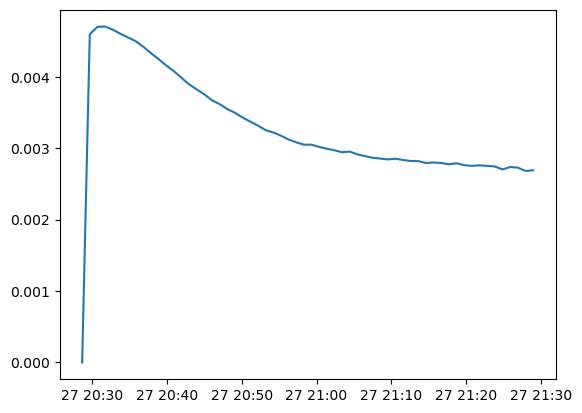

In [85]:
plt.plot(np.array(data)[:,0],np.array(data)[:,1]*-1)

In [54]:
data = []
exp_time = 1.
start = Time.now()
wavelength, entry_width, exit_width, gratingType = await set_params(500, 4.5, 4.5, grating)
wls_power = 1000
tmp = await WhiteLightSource.cmd_turnLampOn.set_start(power=wls_power)
for x in range(60):
    print('{}/60'.format(x))
    tmp2 = await elec_meas(exp_time)   
    await asyncio.sleep(60)
    end_meas = Time.now().isot
    data.append([start_meas, end_meas, wls_power, exp_time, wavelength, entry_width, exit_width, gratingType])

0/60
1/60
4/60
5/60
6/60
7/60
8/60
9/60
10/60
11/60
12/60
13/60
14/60
15/60
16/60
17/60
18/60
19/60
20/60
21/60
22/60
23/60
24/60
25/60
26/60
27/60
28/60
29/60
30/60
31/60
32/60
33/60
34/60
35/60
36/60
37/60
38/60
39/60
40/60
41/60
42/60
43/60
44/60
45/60
46/60
47/60
48/60
49/60
50/60
51/60
52/60
53/60
54/60
55/60
56/60
57/60
58/60
59/60


In [39]:
data = []
exp_time = 1.
start = Time.now()
for wls_power in [1100, 1100, 1100, 1100]:
    tmp = await WhiteLightSource.cmd_turnLampOn.set_start(power=wls_power)
    for wave in np.linspace(300, 1200, 10):
        print(wave, Time.now())
        for entry_width in [0.5, 4.9]: #[, 0.1]: #, 3., 4., 4.9]:
            for exit_width in [0.5, 4.9]: #[0.02,0.04, 0.06, 0.08, 0.1]: #, 3., 4., 4.9]:
                start_meas = Time.now().isot
                wavelength, entry_width, exit_width, gratingType = await set_params(wave, entry_width, exit_width, grating)
                tmp2 = await elec_meas(exp_time)   
                await asyncio.sleep(5.)
                end_meas = Time.now().isot
                data.append([start_meas, end_meas, wls_power, exp_time, wavelength, entry_width, exit_width, gratingType])

300.0 2022-09-23 21:29:59.942044
400.0 2022-09-23 21:31:00.886799
500.0 2022-09-23 21:31:55.564427
600.0 2022-09-23 21:32:50.290792
700.0 2022-09-23 21:33:45.626409
800.0 2022-09-23 21:34:40.054433
900.0 2022-09-23 21:35:35.355374
1000.0 2022-09-23 21:36:30.870380
1100.0 2022-09-23 21:37:26.491305
1200.0 2022-09-23 21:38:21.841314
300.0 2022-09-23 21:39:17.009545
400.0 2022-09-23 21:40:17.806637
500.0 2022-09-23 21:41:12.407984
600.0 2022-09-23 21:42:06.907826
700.0 2022-09-23 21:43:01.369620
800.0 2022-09-23 21:43:56.398095
900.0 2022-09-23 21:44:51.371296
1000.0 2022-09-23 21:45:47.016320
1100.0 2022-09-23 21:46:42.674922
1200.0 2022-09-23 21:47:37.906123
300.0 2022-09-23 21:48:33.591376
400.0 2022-09-23 21:49:34.380938
500.0 2022-09-23 21:50:29.484454
600.0 2022-09-23 21:51:24.579484
700.0 2022-09-23 21:52:19.785419
800.0 2022-09-23 21:53:14.868813
900.0 2022-09-23 21:54:10.587481
1000.0 2022-09-23 21:55:06.271500
1100.0 2022-09-23 21:56:02.098341
1200.0 2022-09-23 21:56:57.235967
3

In [55]:
  
df = pd.DataFrame(data, columns=['start','end','wls_power','exptime','wavelength','entry','exit','grating'])
end_time = Time.now()
date = end_time.datetime.date().strftime('%Y-%m-%d')
await setup_data_file('wls_power_stability_{}W_500nm_{}'.format(wls_power, date), start_time, end_time, df, fs=False, elec=True)

[('start', '<U23'), ('end', '<U23'), ('wls_power', '<i8'), ('exptime', '<f8'), ('wavelength', '<f8'), ('entry', '<f8'), ('exit', '<f8'), ('grating', '<i8')]
Data saved to file /home/parfa30/DATA/AuxTel/wls_power_stability_1000W_500nm_2022-09-27.fits
